In [2]:
import pandas as pd 
import numpy as np 
import torch 
import matplotlib 
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [3]:
root_dir = './cars_dataset'
data_images = []
data_labels = []

for root, dirnames, filenames in os.walk(root_dir):
    for filename in filenames:
        data_images.append(os.path.join(root, filename).split('\\')[-1])
        data_labels.append(os.path.join(root, filename).split('\\')[-2])

classes = list(set(data_labels))
classes.sort()
num_classes = len(classes)

print(f"Sorted Class: {classes}")
print(f"Number of Class: {num_classes}")
print(f"List of Images: {data_images}")
print(f"List of Labels: {data_labels}")
print(f"Number of Images: {len(data_images)}")

Sorted Class: ['./cars_dataset', 'Acura Integra Type R 2001', 'Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura ZDX Hatchback 2012', 'Am General Hummer SUV 2000', 'Aston Martin V8 Vantage Convertible 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Convertible 2012', 'Aston Martin Virage Coupe 2012', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 'Audi A5 Coupe 2012', 'Audi R8 Coupe 2012', 'Audi RS 4 Convertible 2008', 'Audi S4 Sedan 2007', 'Audi S4 Sedan 2012', 'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012', 'Audi S6 Sedan 2011', 'Audi TT Hatchback 2011', 'Audi TT RS Coupe 2012', 'Audi TTS Coupe 2012', 'Audi V8 Sedan 1994', 'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012', 'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012', 'BMW 6 Series Convertible 2007', 'BMW ActiveHybrid 5 Sedan 2012', 'BMW M3 Coupe 2012', 'BMW M5 Sedan 2010', 'BMW M6 Convertible 2010', 'BMW X3 SUV 2012', 'BMW X5 SUV 2007', 'BMW X6 SUV

In [106]:
label_enc = dict(zip(classes, range(0, num_classes)))
print(label_enc)

{'Acura Integra Type R 2001': 0, 'Acura RL Sedan 2012': 1, 'Acura TL Sedan 2012': 2, 'Acura TL Type-S 2008': 3, 'Acura TSX Sedan 2012': 4, 'Acura ZDX Hatchback 2012': 5, 'Am General Hummer SUV 2000': 6, 'Aston Martin V8 Vantage Convertible 2012': 7, 'Aston Martin V8 Vantage Coupe 2012': 8, 'Aston Martin Virage Convertible 2012': 9, 'Aston Martin Virage Coupe 2012': 10, 'Audi 100 Sedan 1994': 11, 'Audi 100 Wagon 1994': 12, 'Audi A5 Coupe 2012': 13, 'Audi R8 Coupe 2012': 14, 'Audi RS 4 Convertible 2008': 15, 'Audi S4 Sedan 2007': 16, 'Audi S4 Sedan 2012': 17, 'Audi S5 Convertible 2012': 18, 'Audi S5 Coupe 2012': 19, 'Audi S6 Sedan 2011': 20, 'Audi TT Hatchback 2011': 21, 'Audi TT RS Coupe 2012': 22, 'Audi TTS Coupe 2012': 23, 'Audi V8 Sedan 1994': 24, 'BMW 1 Series Convertible 2012': 25, 'BMW 1 Series Coupe 2012': 26, 'BMW 3 Series Sedan 2012': 27, 'BMW 3 Series Wagon 2012': 28, 'BMW 6 Series Convertible 2007': 29, 'BMW ActiveHybrid 5 Sedan 2012': 30, 'BMW M3 Coupe 2012': 31, 'BMW M5 Sed

In [107]:
inv_label_enc = {v: k for k, v in label_enc.items()}
print(inv_label_enc)

{0: 'Acura Integra Type R 2001', 1: 'Acura RL Sedan 2012', 2: 'Acura TL Sedan 2012', 3: 'Acura TL Type-S 2008', 4: 'Acura TSX Sedan 2012', 5: 'Acura ZDX Hatchback 2012', 6: 'Am General Hummer SUV 2000', 7: 'Aston Martin V8 Vantage Convertible 2012', 8: 'Aston Martin V8 Vantage Coupe 2012', 9: 'Aston Martin Virage Convertible 2012', 10: 'Aston Martin Virage Coupe 2012', 11: 'Audi 100 Sedan 1994', 12: 'Audi 100 Wagon 1994', 13: 'Audi A5 Coupe 2012', 14: 'Audi R8 Coupe 2012', 15: 'Audi RS 4 Convertible 2008', 16: 'Audi S4 Sedan 2007', 17: 'Audi S4 Sedan 2012', 18: 'Audi S5 Convertible 2012', 19: 'Audi S5 Coupe 2012', 20: 'Audi S6 Sedan 2011', 21: 'Audi TT Hatchback 2011', 22: 'Audi TT RS Coupe 2012', 23: 'Audi TTS Coupe 2012', 24: 'Audi V8 Sedan 1994', 25: 'BMW 1 Series Convertible 2012', 26: 'BMW 1 Series Coupe 2012', 27: 'BMW 3 Series Sedan 2012', 28: 'BMW 3 Series Wagon 2012', 29: 'BMW 6 Series Convertible 2007', 30: 'BMW ActiveHybrid 5 Sedan 2012', 31: 'BMW M3 Coupe 2012', 32: 'BMW M5

In [108]:
data = pd.DataFrame()
data['filename'] = data_images
data['folder'] = data_labels

In [109]:
data

,filename,folder
0,00128.jpg,Acura Integra Type R 2001
1,00130.jpg,Acura Integra Type R 2001
2,00198.jpg,Acura Integra Type R 2001
3,00255.jpg,Acura Integra Type R 2001
4,00308.jpg,Acura Integra Type R 2001
...,...,...
16134,07683.jpg,Volvo XC90 SUV 2007
16135,07838.jpg,Volvo XC90 SUV 2007
16136,07931.jpg,Volvo XC90 SUV 2007
16137,07950.jpg,Volvo XC90 SUV 2007


In [111]:
label_enc['Am General Hummer SUV 2000']

6

In [112]:
labels_series = data['folder'].apply(lambda x: label_enc[x])
labels_series

0          0
1          0
2          0
3          0
4          0
        ... 
16134    195
16135    195
16136    195
16137    195
16138    195
Name: folder, Length: 16139, dtype: int64

In [113]:
final_label = data.copy()
final_label['label'] = labels_series
final_label

,filename,folder,label
0,00128.jpg,Acura Integra Type R 2001,0
1,00130.jpg,Acura Integra Type R 2001,0
2,00198.jpg,Acura Integra Type R 2001,0
3,00255.jpg,Acura Integra Type R 2001,0
4,00308.jpg,Acura Integra Type R 2001,0
...,...,...,...
16134,07683.jpg,Volvo XC90 SUV 2007,195
16135,07838.jpg,Volvo XC90 SUV 2007,195
16136,07931.jpg,Volvo XC90 SUV 2007,195
16137,07950.jpg,Volvo XC90 SUV 2007,195


Text(0, 0.5, 'Count')

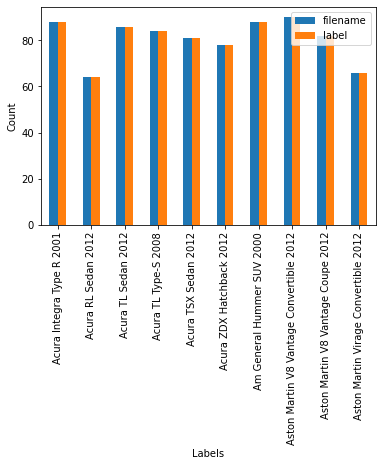

In [114]:
final_label.groupby('folder').count().head(10).plot.bar()
plt.xlabel('Labels')
plt.ylabel('Count')

In [115]:
final_label.groupby('label').count()

,filename,folder
label,,
0,88,88
1,64,64
2,86,86
3,84,84
4,81,81
...,...,...
191,92,92
192,86,86
193,91,91


Text(0, 0.5, 'Count')

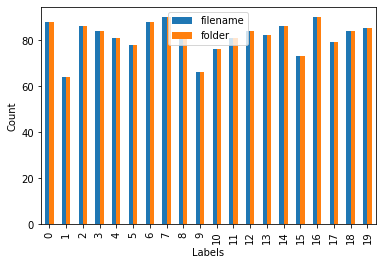

In [116]:
final_label.groupby('label').count().head(20).plot.bar()
plt.xlabel('Labels')
plt.ylabel('Count')

In [117]:
final_label

,filename,folder,label
0,00128.jpg,Acura Integra Type R 2001,0
1,00130.jpg,Acura Integra Type R 2001,0
2,00198.jpg,Acura Integra Type R 2001,0
3,00255.jpg,Acura Integra Type R 2001,0
4,00308.jpg,Acura Integra Type R 2001,0
...,...,...,...
16134,07683.jpg,Volvo XC90 SUV 2007,195
16135,07838.jpg,Volvo XC90 SUV 2007,195
16136,07931.jpg,Volvo XC90 SUV 2007,195
16137,07950.jpg,Volvo XC90 SUV 2007,195


In [159]:
train_df, valid_df = train_test_split(final_label, test_size=0.5, random_state=42)

In [160]:
print(len(train_df))
print(len(valid_df))

8069
8070


In [161]:
train_df.groupby('label').count()

,filename,folder
label,,
0,40,40
1,31,31
2,51,51
3,43,43
4,38,38
...,...,...
191,50,50
192,39,39
193,45,45


In [162]:
valid_df.groupby('label').count()

,filename,folder
label,,
0,48,48
1,33,33
2,35,35
3,41,41
4,43,43
...,...,...
191,42,42
192,47,47
193,46,46


In [163]:
valid_df.label[0] == 0

True

In [164]:
len(valid_df)

8070

In [189]:
df_0 = valid_df[valid_df['label'] == 0]
df_1 = valid_df[valid_df['label'] == 1]
df_2 = valid_df[valid_df['label'] == 2]
df_3 = valid_df[valid_df['label'] == 3]
df_4 = valid_df[valid_df['label'] == 4]
df_5 = valid_df[valid_df['label'] == 5]
df_6 = valid_df[valid_df['label'] == 6]
df_7 = valid_df[valid_df['label'] == 7]
df_8 = valid_df[valid_df['label'] == 8]
df_9 = valid_df[valid_df['label'] == 9]
df_10 = valid_df[valid_df['label'] == 10]
df_11 = valid_df[valid_df['label'] == 11]
df_12 = valid_df[valid_df['label'] == 12]
df_13 = valid_df[valid_df['label'] == 13]
df_14 = valid_df[valid_df['label'] == 14]
df_15 = valid_df[valid_df['label'] == 15]
df_16 = valid_df[valid_df['label'] == 16]
df_17 = valid_df[valid_df['label'] == 17]
df_18 = valid_df[valid_df['label'] == 18]
df_19 = valid_df[valid_df['label'] == 19]
df_20 = valid_df[valid_df['label'] == 20]
df_21 = valid_df[valid_df['label'] == 21]
df_22 = valid_df[valid_df['label'] == 22]
df_23 = valid_df[valid_df['label'] == 23]
df_24 = valid_df[valid_df['label'] == 24]
df_25 = valid_df[valid_df['label'] == 25]
df_26 = valid_df[valid_df['label'] == 26]
df_27 = valid_df[valid_df['label'] == 27]
df_28 = valid_df[valid_df['label'] == 28]
df_29 = valid_df[valid_df['label'] == 29]
df_30 = valid_df[valid_df['label'] == 30]
df_31 = valid_df[valid_df['label'] == 31]
df_32 = valid_df[valid_df['label'] == 32]
df_33 = valid_df[valid_df['label'] == 33]
df_34 = valid_df[valid_df['label'] == 34]
df_35 = valid_df[valid_df['label'] == 35]
df_36 = valid_df[valid_df['label'] == 36]
df_37 = valid_df[valid_df['label'] == 37]
df_38 = valid_df[valid_df['label'] == 38]
df_39 = valid_df[valid_df['label'] == 39]
df_40 = valid_df[valid_df['label'] == 40]
df_41 = valid_df[valid_df['label'] == 41]
df_42 = valid_df[valid_df['label'] == 42]
df_43 = valid_df[valid_df['label'] == 43]
df_44 = valid_df[valid_df['label'] == 44]
df_45 = valid_df[valid_df['label'] == 45]
df_46 = valid_df[valid_df['label'] == 46]
df_47 = valid_df[valid_df['label'] == 47]
df_48 = valid_df[valid_df['label'] == 48]
df_49 = valid_df[valid_df['label'] == 49]
df_50 = valid_df[valid_df['label'] == 50]
df_51 = valid_df[valid_df['label'] == 51]
df_52 = valid_df[valid_df['label'] == 52]
df_53 = valid_df[valid_df['label'] == 53]
df_54 = valid_df[valid_df['label'] == 54]
df_55 = valid_df[valid_df['label'] == 55]
df_56 = valid_df[valid_df['label'] == 56]
df_57 = valid_df[valid_df['label'] == 57]
df_58 = valid_df[valid_df['label'] == 58]
df_59 = valid_df[valid_df['label'] == 59]
df_60 = valid_df[valid_df['label'] == 60]
df_61 = valid_df[valid_df['label'] == 61]
df_62 = valid_df[valid_df['label'] == 62]
df_63 = valid_df[valid_df['label'] == 63]
df_64 = valid_df[valid_df['label'] == 64]
df_65 = valid_df[valid_df['label'] == 65]
df_66 = valid_df[valid_df['label'] == 66]
df_67 = valid_df[valid_df['label'] == 67]
df_68 = valid_df[valid_df['label'] == 68]
df_69 = valid_df[valid_df['label'] == 69]
df_70 = valid_df[valid_df['label'] == 70]
df_71 = valid_df[valid_df['label'] == 71]
df_72 = valid_df[valid_df['label'] == 72]
df_73 = valid_df[valid_df['label'] == 73]
df_74 = valid_df[valid_df['label'] == 74]
df_75 = valid_df[valid_df['label'] == 75]
df_76 = valid_df[valid_df['label'] == 76]
df_77 = valid_df[valid_df['label'] == 77]
df_78 = valid_df[valid_df['label'] == 78]
df_79 = valid_df[valid_df['label'] == 79]
df_80 = valid_df[valid_df['label'] == 80]
df_81 = valid_df[valid_df['label'] == 81]
df_82 = valid_df[valid_df['label'] == 82]
df_83 = valid_df[valid_df['label'] == 83]
df_84 = valid_df[valid_df['label'] == 84]
df_85 = valid_df[valid_df['label'] == 85]
df_86 = valid_df[valid_df['label'] == 86]
df_87 = valid_df[valid_df['label'] == 87]
df_88 = valid_df[valid_df['label'] == 88]
df_89 = valid_df[valid_df['label'] == 89]
df_90 = valid_df[valid_df['label'] == 90]
df_91 = valid_df[valid_df['label'] == 91]
df_92 = valid_df[valid_df['label'] == 92]
df_93 = valid_df[valid_df['label'] == 93]
df_94 = valid_df[valid_df['label'] == 94]
df_95 = valid_df[valid_df['label'] == 95]
df_96 = valid_df[valid_df['label'] == 96]
df_97 = valid_df[valid_df['label'] == 97]
df_98 = valid_df[valid_df['label'] == 98]
df_99 = valid_df[valid_df['label'] == 99]
df_100 = valid_df[valid_df['label'] == 100]
df_101 = valid_df[valid_df['label'] == 101]
df_102 = valid_df[valid_df['label'] == 102]
df_103 = valid_df[valid_df['label'] == 103]
df_104 = valid_df[valid_df['label'] == 104]
df_105 = valid_df[valid_df['label'] == 105]
df_106 = valid_df[valid_df['label'] == 106]
df_107 = valid_df[valid_df['label'] == 107]
df_108 = valid_df[valid_df['label'] == 108]
df_109 = valid_df[valid_df['label'] == 109]
df_110 = valid_df[valid_df['label'] == 110]
df_111 = valid_df[valid_df['label'] == 111]
df_112 = valid_df[valid_df['label'] == 112]
df_113 = valid_df[valid_df['label'] == 113]
df_114 = valid_df[valid_df['label'] == 114]
df_115 = valid_df[valid_df['label'] == 115]
df_116 = valid_df[valid_df['label'] == 116]
df_117 = valid_df[valid_df['label'] == 117]
df_118 = valid_df[valid_df['label'] == 118]
df_119 = valid_df[valid_df['label'] == 119]
df_120 = valid_df[valid_df['label'] == 120]
df_121 = valid_df[valid_df['label'] == 121]
df_122 = valid_df[valid_df['label'] == 122]
df_123 = valid_df[valid_df['label'] == 123]
df_124 = valid_df[valid_df['label'] == 124]
df_125 = valid_df[valid_df['label'] == 125]
df_126 = valid_df[valid_df['label'] == 126]
df_127 = valid_df[valid_df['label'] == 127]
df_128 = valid_df[valid_df['label'] == 128]
df_129 = valid_df[valid_df['label'] == 129]
df_130 = valid_df[valid_df['label'] == 130]
df_131 = valid_df[valid_df['label'] == 131]
df_132 = valid_df[valid_df['label'] == 132]
df_133 = valid_df[valid_df['label'] == 133]
df_134 = valid_df[valid_df['label'] == 134]
df_135 = valid_df[valid_df['label'] == 135]
df_136 = valid_df[valid_df['label'] == 136]
df_137 = valid_df[valid_df['label'] == 137]
df_138 = valid_df[valid_df['label'] == 138]
df_139 = valid_df[valid_df['label'] == 139]
df_140 = valid_df[valid_df['label'] == 140]
df_141 = valid_df[valid_df['label'] == 141]
df_142 = valid_df[valid_df['label'] == 142]
df_143 = valid_df[valid_df['label'] == 143]
df_144 = valid_df[valid_df['label'] == 144]
df_145 = valid_df[valid_df['label'] == 145]
df_146 = valid_df[valid_df['label'] == 146]
df_147 = valid_df[valid_df['label'] == 147]
df_148 = valid_df[valid_df['label'] == 148]
df_149 = valid_df[valid_df['label'] == 149]
df_150 = valid_df[valid_df['label'] == 150]
df_151 = valid_df[valid_df['label'] == 151]
df_152 = valid_df[valid_df['label'] == 152]
df_153 = valid_df[valid_df['label'] == 153]
df_154 = valid_df[valid_df['label'] == 154]
df_155 = valid_df[valid_df['label'] == 155]
df_156 = valid_df[valid_df['label'] == 156]
df_157 = valid_df[valid_df['label'] == 157]
df_158 = valid_df[valid_df['label'] == 158]
df_159 = valid_df[valid_df['label'] == 159]
df_160 = valid_df[valid_df['label'] == 160]
df_161 = valid_df[valid_df['label'] == 161]
df_162 = valid_df[valid_df['label'] == 162]
df_163 = valid_df[valid_df['label'] == 163]
df_164 = valid_df[valid_df['label'] == 164]
df_165 = valid_df[valid_df['label'] == 165]
df_166 = valid_df[valid_df['label'] == 166]
df_167 = valid_df[valid_df['label'] == 167]
df_168 = valid_df[valid_df['label'] == 168]
df_169 = valid_df[valid_df['label'] == 169]
df_170 = valid_df[valid_df['label'] == 170]
df_171 = valid_df[valid_df['label'] == 171]
df_172 = valid_df[valid_df['label'] == 172]
df_173 = valid_df[valid_df['label'] == 173]
df_174 = valid_df[valid_df['label'] == 174]
df_175 = valid_df[valid_df['label'] == 175]
df_176 = valid_df[valid_df['label'] == 176]
df_177 = valid_df[valid_df['label'] == 177]
df_178 = valid_df[valid_df['label'] == 178]
df_179 = valid_df[valid_df['label'] == 179]
df_180 = valid_df[valid_df['label'] == 180]
df_181 = valid_df[valid_df['label'] == 181]
df_182 = valid_df[valid_df['label'] == 182]
df_183 = valid_df[valid_df['label'] == 183]
df_184 = valid_df[valid_df['label'] == 184]
df_185 = valid_df[valid_df['label'] == 185]
df_186 = valid_df[valid_df['label'] == 186]
df_187 = valid_df[valid_df['label'] == 187]
df_188 = valid_df[valid_df['label'] == 188]
df_189 = valid_df[valid_df['label'] == 189]
df_190 = valid_df[valid_df['label'] == 190]
df_191 = valid_df[valid_df['label'] == 191]
df_192 = valid_df[valid_df['label'] == 192]
df_193 = valid_df[valid_df['label'] == 193]
df_194 = valid_df[valid_df['label'] == 194]
df_195 = valid_df[valid_df['label'] == 195]

In [190]:
valid_df.groupby('label').count()

,filename,folder
label,,
0,48,48
1,33,33
2,35,35
3,41,41
4,43,43
...,...,...
191,42,42
192,47,47
193,46,46


In [196]:
benchmark_df = pd.concat((
    df_0.head(5), df_0.tail(5),
    df_1.head(5), df_1.tail(5),
    df_2.head(5), df_2.tail(5),
    df_3.head(5), df_3.tail(5),
    df_4.head(5), df_4.tail(5),
    df_5.head(5), df_5.tail(5),
    df_6.head(5), df_6.tail(5),
    df_7.head(5), df_7.tail(5),
    df_8.head(5), df_8.tail(5),
    df_9.head(5), df_9.tail(5),
    df_10.head(5), df_10.tail(5),
    df_11.head(5), df_11.tail(5),
    df_12.head(5), df_12.tail(5),
    df_13.head(5), df_13.tail(5),
    df_14.head(5), df_14.tail(5),
    df_15.head(5), df_15.tail(5),
    df_16.head(5), df_16.tail(5),
    df_17.head(5), df_17.tail(5),
    df_18.head(5), df_18.tail(5),
    df_19.head(5), df_19.tail(5),
    df_20.head(5), df_20.tail(5),
    df_21.head(5), df_21.tail(5),
    df_22.head(5), df_22.tail(5),
    df_23.head(5), df_23.tail(5),
    df_24.head(5), df_24.tail(5),
    df_25.head(5), df_25.tail(5),
    df_26.head(5), df_26.tail(5),
    df_27.head(5), df_27.tail(5),
    df_28.head(5), df_28.tail(5),
    df_29.head(5), df_29.tail(5),
    df_30.head(5), df_30.tail(5),
    df_31.head(5), df_31.tail(5),
    df_32.head(5), df_32.tail(5),
    df_33.head(5), df_33.tail(5),
    df_34.head(5), df_34.tail(5),
    df_35.head(5), df_35.tail(5),
    df_36.head(5), df_36.tail(5),
    df_37.head(5), df_37.tail(5),
    df_38.head(5), df_38.tail(5),
    df_39.head(5), df_39.tail(5),
    df_40.head(5), df_40.tail(5),
    df_41.head(5), df_41.tail(5),
    df_42.head(5), df_42.tail(5),
    df_43.head(5), df_43.tail(5),
    df_44.head(5), df_44.tail(5),
    df_45.head(5), df_45.tail(5),
    df_46.head(5), df_46.tail(5),
    df_47.head(5), df_47.tail(5),
    df_48.head(5), df_48.tail(5),
    df_49.head(5), df_49.tail(5),
    df_50.head(5), df_50.tail(5),
    df_51.head(5), df_51.tail(5),
    df_52.head(5), df_52.tail(5),
    df_53.head(5), df_53.tail(5),
    df_54.head(5), df_54.tail(5),
    df_55.head(5), df_55.tail(5),
    df_56.head(5), df_56.tail(5),
    df_57.head(5), df_57.tail(5),
    df_58.head(5), df_58.tail(5),
    df_59.head(5), df_59.tail(5),
    df_60.head(5), df_60.tail(5),
    df_61.head(5), df_61.tail(5),
    df_62.head(5), df_62.tail(5),
    df_63.head(5), df_63.tail(5),
    df_64.head(5), df_64.tail(5),
    df_65.head(5), df_65.tail(5),
    df_66.head(5), df_66.tail(5),
    df_67.head(5), df_67.tail(5),
    df_68.head(5), df_68.tail(5),
    df_69.head(5), df_69.tail(5),
    df_70.head(5), df_70.tail(5),
    df_71.head(5), df_71.tail(5),
    df_72.head(5), df_72.tail(5),
    df_73.head(5), df_73.tail(5),
    df_74.head(5), df_74.tail(5),
    df_75.head(5), df_75.tail(5),
    df_76.head(5), df_76.tail(5),
    df_77.head(5), df_77.tail(5),
    df_78.head(5), df_78.tail(5),
    df_79.head(5), df_79.tail(5),
    df_80.head(5), df_80.tail(5),
    df_81.head(5), df_81.tail(5),
    df_82.head(5), df_82.tail(5),
    df_83.head(5), df_83.tail(5),
    df_84.head(5), df_84.tail(5),
    df_85.head(5), df_85.tail(5),
    df_86.head(5), df_86.tail(5),
    df_87.head(5), df_87.tail(5),
    df_88.head(5), df_88.tail(5),
    df_89.head(5), df_89.tail(5),
    df_90.head(5), df_90.tail(5),
    df_91.head(5), df_91.tail(5),
    df_92.head(5), df_92.tail(5),
    df_93.head(5), df_93.tail(5),
    df_94.head(5), df_94.tail(5),
    df_95.head(5), df_95.tail(5),
    df_96.head(5), df_96.tail(5),
    df_97.head(5), df_97.tail(5),
    df_98.head(5), df_98.tail(5),
    df_99.head(5), df_99.tail(5),
    df_100.head(5), df_100.tail(5),
    df_101.head(5), df_101.tail(5),
    df_102.head(5), df_102.tail(5),
    df_103.head(5), df_103.tail(5),
    df_104.head(5), df_104.tail(5),
    df_105.head(5), df_105.tail(5),
    df_106.head(5), df_106.tail(5),
    df_107.head(5), df_107.tail(5),
    df_108.head(5), df_108.tail(5),
    df_109.head(5), df_109.tail(5),
    df_110.head(5), df_110.tail(5),
    df_111.head(5), df_111.tail(5),
    df_112.head(5), df_112.tail(5),
    df_113.head(5), df_113.tail(5),
    df_114.head(5), df_114.tail(5),
    df_115.head(5), df_115.tail(5),
    df_116.head(5), df_116.tail(5),
    df_117.head(5), df_117.tail(5),
    df_118.head(5), df_118.tail(5),
    df_119.head(5), df_119.tail(5),
    df_120.head(5), df_120.tail(5),
    df_121.head(5), df_121.tail(5),
    df_122.head(5), df_122.tail(5),
    df_123.head(5), df_123.tail(5),
    df_124.head(5), df_124.tail(5),
    df_125.head(5), df_125.tail(5),
    df_126.head(5), df_126.tail(5),
    df_127.head(5), df_127.tail(5),
    df_128.head(5), df_128.tail(5),
    df_129.head(5), df_129.tail(5),
    df_130.head(5), df_130.tail(5),
    df_131.head(5), df_131.tail(5),
    df_132.head(5), df_132.tail(5),
    df_133.head(5), df_133.tail(5),
    df_134.head(5), df_134.tail(5),
    df_135.head(5), df_135.tail(5),
    df_136.head(5), df_136.tail(5),
    df_137.head(5), df_137.tail(5),
    df_138.head(5), df_138.tail(5),
    df_139.head(5), df_139.tail(5),
    df_140.head(5), df_140.tail(5),
    df_141.head(5), df_141.tail(5),
    df_142.head(5), df_142.tail(5),
    df_143.head(5), df_143.tail(5),
    df_144.head(5), df_144.tail(5),
    df_145.head(5), df_145.tail(5),
    df_146.head(5), df_146.tail(5),
    df_147.head(5), df_147.tail(5),
    df_148.head(5), df_148.tail(5),
    df_149.head(5), df_149.tail(5),
    df_150.head(5), df_150.tail(5),
    df_151.head(5), df_151.tail(5),
    df_152.head(5), df_152.tail(5),
    df_153.head(5), df_153.tail(5),
    df_154.head(5), df_154.tail(5),
    df_155.head(5), df_155.tail(5),
    df_156.head(5), df_156.tail(5),
    df_157.head(5), df_157.tail(5),
    df_158.head(5), df_158.tail(5),
    df_159.head(5), df_159.tail(5),
    df_160.head(5), df_160.tail(5),
    df_161.head(5), df_161.tail(5),
    df_162.head(5), df_162.tail(5),
    df_163.head(5), df_163.tail(5),
    df_164.head(5), df_164.tail(5),
    df_165.head(5), df_165.tail(5),
    df_166.head(5), df_166.tail(5),
    df_167.head(5), df_167.tail(5),
    df_168.head(5), df_168.tail(5),
    df_169.head(5), df_169.tail(5),
    df_170.head(5), df_170.tail(5),
    df_171.head(5), df_171.tail(5),
    df_172.head(5), df_172.tail(5),
    df_173.head(5), df_173.tail(5),
    df_174.head(5), df_174.tail(5),
    df_175.head(5), df_175.tail(5),
    df_176.head(5), df_176.tail(5),
    df_177.head(5), df_177.tail(5),
    df_178.head(5), df_178.tail(5),
    df_179.head(5), df_179.tail(5),
    df_180.head(5), df_180.tail(5),
    df_181.head(5), df_181.tail(5),
    df_182.head(5), df_182.tail(5),
    df_183.head(5), df_183.tail(5),
    df_184.head(5), df_184.tail(5),
    df_185.head(5), df_185.tail(5),
    df_186.head(5), df_186.tail(5),
    df_187.head(5), df_187.tail(5),
    df_188.head(5), df_188.tail(5),
    df_189.head(5), df_189.tail(5),
    df_190.head(5), df_190.tail(5),
    df_191.head(5), df_191.tail(5),
    df_192.head(5), df_192.tail(5),
    df_193.head(5), df_193.tail(5),
    df_194.head(5), df_194.tail(5),
    df_195.head(5), df_195.tail(5),
    ))


,filename,folder,label
3,00255.jpg,Acura Integra Type R 2001,0
19,01864.jpg,Acura Integra Type R 2001,0
47,04471.jpg,Acura Integra Type R 2001,0
84,07800.jpg,Acura Integra Type R 2001,0
46,04224.jpg,Acura Integra Type R 2001,0
...,...,...,...
16133,07647.jpg,Volvo XC90 SUV 2007,195
16130,07413.jpg,Volvo XC90 SUV 2007,195
16138,07983.jpg,Volvo XC90 SUV 2007,195
16075,02127.jpg,Volvo XC90 SUV 2007,195


In [195]:
benchmark_df['label'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [197]:
benchmark_df.index


Int64Index([    3,    19,    47,    84,    46,    12,    30,    28,    57,
               48,
            ...
            16085, 16128, 16082, 16083, 16069, 16133, 16130, 16138, 16075,
            16097],
           dtype='int64', length=1960)

In [198]:
len(benchmark_df)


1960

In [199]:
valid_df = valid_df.drop(index=benchmark_df.index)


In [201]:
len(valid_df)

6110

Text(0, 0.5, 'Count')

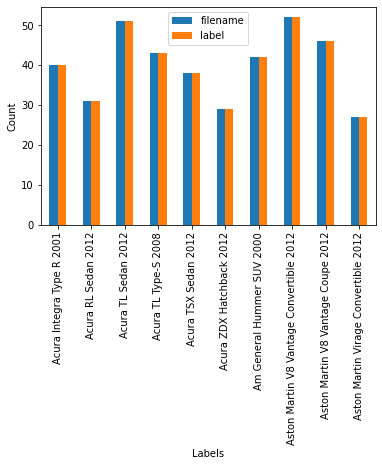

In [203]:
train_df.groupby('folder').count().head(10).plot.bar()
plt.xlabel('Labels')
plt.ylabel('Count')


In [204]:
len(train_df)

8069

In [205]:
len(train_df.groupby('folder').count().filename)


196

In [206]:
def count_weighted(df):
    weight = list()
    total_class = len(df.groupby('folder').count().filename)
    total_files = len(df)
    for total_files_in_class in train_df.groupby('folder').count().filename:
        # print(total_files_in_class)
        # print(total_files)
        w = total_files / (total_class * total_files_in_class)
        # print(w)
        weight.append(w)
    return weight


In [207]:
weight = count_weighted(train_df)


In [208]:
import torch
torch.Tensor(weight)


tensor([1.0292, 1.3280, 0.8072, 0.9574, 1.0834, 1.4196, 0.9802, 0.7917, 0.8950,
        1.5248, 1.0292, 0.9149, 0.9574, 0.9802, 0.8759, 1.1436, 0.9356, 1.2108,
        1.0292, 1.2475, 0.7768, 1.1436, 0.8577, 0.8950, 0.8950, 1.2865, 0.9356,
        0.8759, 0.8759, 1.0556, 1.2475, 1.2475, 0.9149, 0.8759, 1.1762, 0.9356,
        1.2108, 1.0041, 1.0292, 0.9574, 0.9149, 1.4196, 1.0292, 1.4703, 1.2108,
        0.9574, 0.8234, 0.9356, 1.1127, 1.0834, 1.3280, 0.8234, 0.9356, 0.9802,
        1.0834, 1.0556, 0.8950, 1.1762, 1.0292, 1.5834, 1.3723, 1.0556, 0.9574,
        1.1762, 0.8577, 0.9149, 1.0292, 0.9356, 0.9802, 0.8234, 1.0556, 1.0556,
        1.2475, 0.9356, 0.9149, 0.9574, 0.9802, 0.8759, 1.0292, 0.9356, 0.9356,
        0.7485, 0.9574, 1.0292, 1.0834, 0.8759, 0.8234, 0.9802, 1.0556, 1.0556,
        0.6978, 1.0041, 0.9802, 1.0556, 1.1436, 0.9574, 1.1127, 0.9149, 1.8713,
        1.1436, 0.9802, 1.1436, 1.3280, 0.9802, 0.9356, 1.1762, 1.0292, 1.1127,
        1.0834, 1.1127, 1.2108, 0.7485, 

Text(0, 0.5, 'Count')

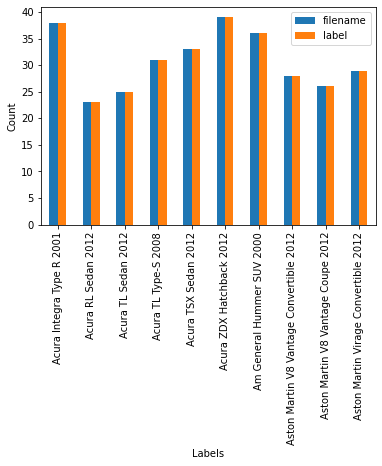

In [210]:
valid_df.groupby('folder').count().head(10).plot.bar()
plt.xlabel('Labels')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

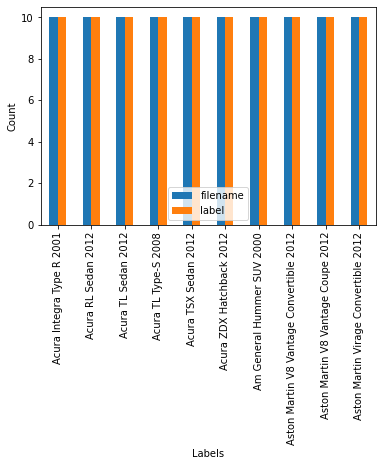

In [211]:
benchmark_df.groupby('folder').count().head(10).plot.bar()
plt.xlabel('Labels')
plt.ylabel('Count')

In [212]:
train_df.to_csv("train.csv", index=False)
valid_df.to_csv("val.csv", index=False)
benchmark_df.to_csv("test.csv", index=False)